<hr style="height:5px;border-width:2;color:gray;background-color:#000000"> 
<center><h1>CS 144 - Winter 2024 - Homework 3</h1></center>
<center><h1>Due: Sunday, February 4, 2024 @ 11:59pm</h1></center>

## Read *all* cells carefully and answer all parts (both text and code)

### Enter your information below:

<div style="color: #000000;background-color: #EEEEFF">
    Your Name (submitter):  <br>
    Your student ID (submitter):
<br>
<br>
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
<br>    
<br>
<b>Instruction for submissions:</B> when you have completed this homework, download this .ipynb file to your computer by left-clicking on the file name, and submit to <a href="https://elearn.ucr.edu/">Canvas</A> by the deadline. 
<br>
<br>
<B>Late work:</B> Each student is granted five "late days" which can be used (in integer units) on any of the homework. If a more dire situation arises, please contact the instructor. DO NOT RESORT TO CHEATING.
</div>


<hr style="height:5px;border-width:2;color:gray;background-color:#000000"> 
<center><h1>Question 1: Suffix arrays</h1></center>
<br>

A suffix array is a simple data structure composed by the sorted list of the suffixes of a given string. A suffix array enables string matching, as well as other text processing operations (e.g., k-mer count, repeated substrings, etc). It is more compact than a suffix tree and is amenable to storage in secondary memory.

<div style="color: #000000;background-color: #EEFFEE">
    <font size=+2>Question 1.1:</font> <font size=+1>(10 points)</font>
<br>
Solve the <A HREF="https://cogniterra.org/lesson/34090/step/2?unit=25936">Code Challenge: Solve the Suffix Array Construction Problem.</A> Submit your solution to the challenge on Cogniterra and paste your Python code below.
</div>

In [1]:
!wget http://www.cs.ucr.edu/~stelo/cs144winter24/data/hw3_test1.txt

--2024-01-29 10:59:16--  http://www.cs.ucr.edu/~stelo/cs144winter24/data/hw3_test1.txt
Resolving www.cs.ucr.edu (www.cs.ucr.edu)... 169.235.30.15
Connecting to www.cs.ucr.edu (www.cs.ucr.edu)|169.235.30.15|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17 [text/plain]
Saving to: 'hw3_test1.txt'

     0K                                                       100%  264K=0s

2024-01-29 10:59:17 (264 KB/s) - 'hw3_test1.txt' saved [17/17]



In [2]:
## no libraries allowed


def getDictionaryOfSuffixes(text):

    indexToSuffix = dict()

    n = len(text)
    for i in range(n):

        eachSuffix = text[i:]

        indexToSuffix[i] = eachSuffix
    
    return indexToSuffix




def suffixArray(t):
    """computes the suffix array of string t by sorting all suffixes of t"""
    
    # 1) Store suffixes -- When storing them, make sure to keep track of the starting index
    
    suffixDictionary = getDictionaryOfSuffixes(text)
    
    # print(suffixDictionary)


    # 2) Sort lexicographically -- sort by the value (item[1])

    sortedSuffixes = dict(sorted(suffixDictionary.items(), key=lambda item: item[1]))

    suffixArray = []
    for key,value in sortedSuffixes.items():
        suffixArray.append(key)
    
    return suffixArray

f = open("hw3_problem1_dataset.txt", "r")         # open the file
text = f.readline().strip()            # text is on the first line
s = suffixArray(text)                  
print(', '.join(map(str,s)))            # expected output 15 14 0 1 12 6 4 2 8 13 3 7 9 10 11 5

806, 91, 671, 92, 672, 426, 266, 93, 673, 786, 144, 306, 3, 427, 292, 767, 267, 94, 97, 674, 639, 41, 215, 192, 461, 711, 104, 787, 145, 72, 404, 590, 705, 35, 307, 458, 650, 433, 4, 230, 139, 515, 506, 428, 547, 293, 169, 768, 497, 484, 268, 89, 784, 1, 95, 228, 137, 241, 563, 540, 16, 535, 668, 98, 643, 349, 467, 329, 675, 597, 156, 640, 444, 634, 243, 315, 725, 410, 249, 658, 575, 278, 42, 216, 342, 101, 401, 665, 193, 729, 701, 462, 419, 165, 66, 712, 78, 447, 105, 70, 356, 628, 788, 654, 146, 176, 565, 150, 718, 542, 384, 488, 367, 73, 737, 757, 405, 797, 747, 437, 591, 529, 180, 706, 394, 57, 133, 254, 36, 479, 679, 308, 687, 380, 30, 358, 493, 630, 790, 258, 110, 619, 765, 637, 459, 656, 417, 148, 178, 392, 83, 18, 537, 441, 722, 651, 434, 62, 116, 567, 802, 5, 211, 697, 614, 231, 246, 140, 646, 224, 152, 207, 23, 516, 601, 507, 120, 429, 85, 548, 294, 170, 50, 475, 769, 498, 485, 744, 20, 237, 363, 525, 761, 373, 269, 581, 556, 90, 670, 425, 785, 143, 305, 2, 96, 40, 191, 589, 

<hr style="height:5px;border-width:2;color:gray;background-color:#000000"> 
<center><h1>Question 2: Burrows-Wheeler Transform</h1></center> 
<br>

In 1994, Burrows and Wheeler proposed a block-oriented compression algorithm based on a new <A href="https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj7gLeyncLvAhVZITQIHWVDBEYQFjABegQIAhAD&url=https%3A%2F%2Fwww.hpl.hp.com%2Ftechreports%2FCompaq-DEC%2FSRC-RR-124.pdf&usg=AOvVaw0n_sUaaD1weYTfUpBIqovr">reversible transformation</A>. The transformation, known as Burrows-Wheeler Transform (BWT), rearranges the input sequence $S$ from a domain (or an alphabet) $\Sigma$, into sequence $B$ of the same domain, $B=BWT(S)$, in such a way that most of the same symbols from $S$ are close together in $B$. In addition to data compression, the BWT also allows efficient exact and approximate string matching in $B$ (e.g., the <A href="https://en.wikipedia.org/wiki/FM-index">FM-index</A>).

We will <b>skip</b> the following three coding challenges on the BWT in the book
<UL>
<LI><A HREF="https://cogniterra.org/lesson/34094/step/8?unit=25940">Code Challenge: Implement BWMatching.</A></LI>
<LI><A HREF="https://cogniterra.org/lesson/34095/step/7?unit=25941">Code Challenge: Implement BetterBWMatching.</A></LI>
<LI><A HREF="https://cogniterra.org/lesson/34097/step/4?unit=25943">Code Challenge: Solve the Multiple Pattern Matching Problem.</A></LI>
</UL>
Again, those three challenges above are OPTIONAL. They are good problems, but you do not need to solve it, unless you feel inclined to do so.

<div style="color: #000000;background-color: #EEFFEE">
    <font size=+2>Question 2.1:</font> <font size=+1>(10 points)</font>
<br>
Solve the <A HREF="https://cogniterra.org/lesson/34091/step/5?unit=25937">Code Challenge: Solve the Burrows-Wheeler Transform Construction Problem.</A> Submit your solution to the challenge on Cogniterra and paste your Python code below. You can call the suffix array above, if you want.
</div>

In [3]:
!wget http://www.cs.ucr.edu/~stelo/cs144winter24/data/hw3_test2.txt

--2024-01-29 11:25:40--  http://www.cs.ucr.edu/~stelo/cs144winter24/data/hw3_test2.txt
Resolving www.cs.ucr.edu (www.cs.ucr.edu)... 169.235.30.15
Connecting to www.cs.ucr.edu (www.cs.ucr.edu)|169.235.30.15|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15 [text/plain]
Saving to: 'hw3_test2.txt'

     0K                                                       100%  260K=0s

2024-01-29 11:25:40 (260 KB/s) - 'hw3_test2.txt' saved [15/15]



In [20]:
## no libraries allowed


# Returns an array of strings
def getCyclicRotations(text):


    cyclicRotations = []

    n = len(text)


    prefix = ""

    # iterate backwards through text
    
    for i in range(n-1, -1,-1):
        
        currLetter = text[i]
        prefix = currLetter + prefix
        suffix = text[0:i]

        eachRotation = prefix + suffix
        

        cyclicRotations.append(eachRotation)

    
    





    return cyclicRotations



def bwt(t):
    '''computes the BWT(t), where t is a string'''
    
    # 1) Get all cyclic rotations of 't' (store in an array)

    cyclicRotations = getCyclicRotations(t)


    # 2) Sort the array by last letter of each word

    sortedRotations = sorted(cyclicRotations)

    # 3) Store a string which is the last letter of each cyclic rotation (in order)


    bwt_string = ""
    for eachWord in sortedRotations:

        lastLetter = eachWord[-1]

        bwt_string += lastLetter


    return bwt_string

f = open("hw3_problem2_dataset.txt", "r")         # open the file
text = f.readline().strip()            # text is on the first line
print(bwt(text))                       # expected output ACTGGCT$TGCGGC

TCATGCTTCACATCCTTAGGGTCAAGGGTATTCAGCTTGCGGAATTCAGTCACAGCGCAAACGGTAAATATTAGACGGGTAGTGTCGTATAACGCTTTCTCACGACCTTCTG$AACTGGGCAGTCATACGATTTGATTACTGAAAACTTGTTATATTCTAACCCTAACCCTCTGCCCCGCAGTGTGTTCATCTATGAGTTTCTTCCAGATTTGCATTAATTAATGCTAGCGGAGCGGAGAGATTTTGTAAACCACCCGGACGCGTTCGCAAACCCGCCTGGAGGAAAGTAAGCAGGCCGGTCGGTCCTCTAGCGACAATAGTCAGAGCGTTTGCATCTTCCGTGCGAACGTCGCTTGCGTTATTTAAGGGCAGTGCCAAGACAAACATATGGAAAAAGCCCGTGGGTAATCTAGAACGTCAGTATGGTGTTCTTTTTCCAAACGTAGGCCGAGAGTGTGGTCATCCGCGGGTAATTAATCCATGAGACTGTGGATTTGAGGAGATCCCTGGAACGAAATCAGGGCTCCGCTATGGGGTGAGTAATGTCGATGGGCGGTCGCTAAAGTTTCTGGAGCCCGCGCTACACGTGCGATAACAGGACTTATCTCGTTGTCGCCTCCTCAGCTCACTTCGCGCGTAGCACAGCAGGAGACGCCACATATCTCTTCCGTCTTAGATTTCATTGAGCTTAGTTTCATAGAGGTTAACCTGGAGGGAGTTCCGTTGAGCCGAACATACTGGACGTATGGCGGACTCCAAGTTGCCCTTCCCGTTTATTCTACAACCGCGTGGAGCTCGAGATTGGCACACGTTTCACCAGGGCGGTTTGATAACTGTGACTATTGATGACGGTTTTACGCATCATCGGATTTAAGCCGAA


<div style="color: #000000;background-color: #EEFFEE">
    <font size=+2>Question 2.2:</font> <font size=+1>(10 points)</font>
<br>
Solve the <A HREF="https://cogniterra.org/lesson/34093/step/10?unit=25939">Code Challenge: Solve the Inverse Burrows-Wheeler Transform Problem.</A> Submit your solution to the challenge on Cogniterra and paste your Python code below.
</div>

In [21]:
!wget http://www.cs.ucr.edu/~stelo/cs144winter24/data/hw3_test3.txt

--2024-01-29 12:18:11--  http://www.cs.ucr.edu/~stelo/cs144winter24/data/hw3_test3.txt
Resolving www.cs.ucr.edu (www.cs.ucr.edu)... 169.235.30.15
Connecting to www.cs.ucr.edu (www.cs.ucr.edu)|169.235.30.15|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12 [text/plain]
Saving to: 'hw3_test3.txt'

     0K                                                       100%  328K=0s

2024-01-29 12:18:11 (328 KB/s) - 'hw3_test3.txt' saved [12/12]



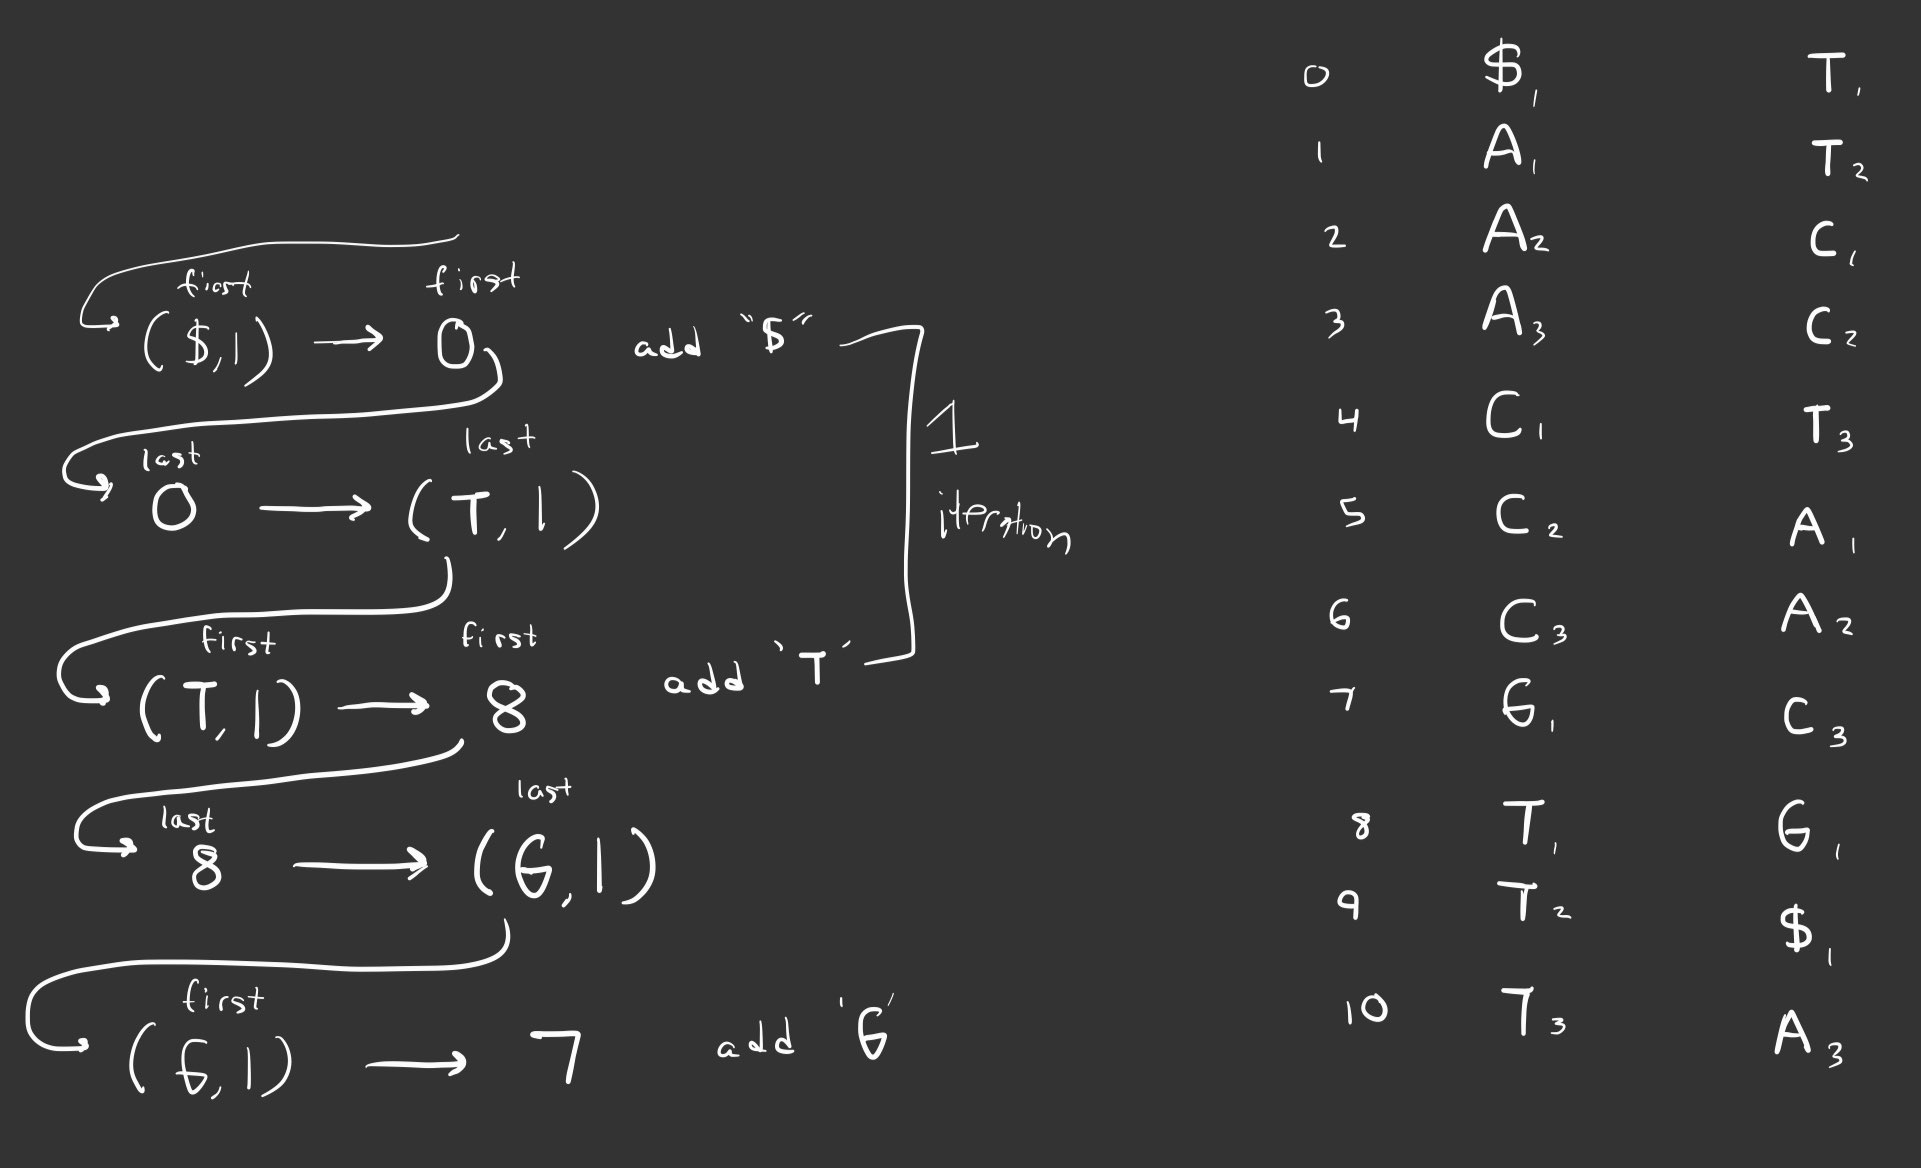

In [30]:
## no libraries allowed

        
class LetterList:

    def __init__(self, arrayOfLetters, isFirstCol : bool) -> None:
        
        self.arrayOfLetters = arrayOfLetters
        self.isFirstCol = isFirstCol

        self.numAs = 0
        self.numCs = 0
        self.numGs = 0
        self.numTs = 0

        self.numDollars = 0

    
    def makeDictionary(self) -> dict:

        n = len(self.arrayOfLetters)

        theDictionary = dict()
        for index in range(n):

            currLetter = self.arrayOfLetters[index]
            currRank = 0

            if(currLetter == 'A'):
                self.numAs += 1
                currRank = self.numAs
                

            if(currLetter == 'C'):
                self.numCs += 1
                currRank = self.numCs
                

            if(currLetter == 'G'):
                self.numGs += 1
                currRank = self.numGs
                
            
            if(currLetter == 'T'):
                self.numTs += 1
                currRank = self.numTs
                

            if(currLetter == '$'):
                self.numDollars += 1
                currRank = self.numDollars

            # at this point, we have all 3 pieces of info: the currLetter, the currRank, and the index


            
            if(self.isFirstCol):

                # (key : value) is ((letter,rank) : indexInList))

                theDictionary[(currLetter,currRank)] = index
                

            else:
                # (key : value) is (indexInList : (letter,rank))

                theDictionary[index] = (currLetter, currRank)

        return theDictionary
    

def recoverOriginalText(n : int, firstColDict : dict, lastColDict : dict):


    originalText = ""
    
    # Start from the end of the text
    eachKey = ('$', 1)

    numLettersRead = 0


    while(numLettersRead < n):

        # Add each character backwards

        currCharacter = eachKey[0]
        
        originalText = currCharacter + originalText
        numLettersRead += 1

        # Get the index of the previous character (in last col)

        indexOfPrevChar = firstColDict[eachKey]

        # Get the curr character and rank (in first col)

        eachKey = lastColDict[indexOfPrevChar]


    return originalText




def reverseBwt(lastCol):
    '''computes the inverse of the BWT, where t is a string'''
    

    # We have the last column of the BWT matrix. We know that sorting ANY column alphabetically gets us the first column


    # 1) Get the first column by sorting the last column
    firstColArray = sorted(lastCol)
    lastColArray = list(lastCol)


    # 2) Create 2 dictionaries. Note: Each letter in a list is uniquely identified by: (letter,rank). (e.g A1, A2, G1, etc.)
        
        # 1. For the first column. In this, the (key : value) is ((letter,rank) : indexInList))
        # 2. For the last column.  In this, the (key : value) is (indexInList : (letter,rank))

        
    
    firstColList : LetterList = LetterList(firstColArray,True) 
    firstColDict : dict = firstColList.makeDictionary()


    lastColList : LetterList = LetterList(lastColArray, False)
    lastColDict : dict = lastColList.makeDictionary()


    # print(firstColDict)
    # print(lastColDict)

    # Using these dictionaries, we can start with ($,1) and do firstCol[(letter,rank)] = indexInList, then put the indexInList into lastCol. <-- Add the currLetter to string
    # Then, we take the index and put it into: lastCol[indexInList] = (letter,rank). Then, we put the (letter,rank) back into firstCol.

    # 3) Follow the algorithm above. Traverse the dictionaries starting with ($,1) in the last dictionary and going back and forth between the 2 dictionaries until all characters are read


    # Input: The length of the string and the 2 dictionaries 
    # Output: A string of the original text

    n = len(lastCol)


    originalText = recoverOriginalText(n,firstColDict, lastColDict)


    return originalText

f = open("hw3_problem3_dataset.txt", "r")         # open the file
text = f.readline().strip()            # text is on the first line
print(reverseBwt(text))                # expected output TACATCACGT$

AAATGATGGATCTATCTCTCACCCCTTAACCGTGGCCATTGCCGGGTCCCAGCATAAGGACACTATAAGGCAGCCCTTAACGTTCCGCGCAACCACCAAGTTAAGAGGAAAATAGCCAAGGCATTTCCAATTTGATCGTCACCAACTGCCGCGATTGCACTGTGGTCCCGTAACGCCCACCGGGGACTCATATCCGCTTCTCATTGATAGTATACCTAACACGTGCCACGCTGAGCCATATAAACCGCGTCGTAGGAAATGGTCAGAGATAAATCTGAGAGTCTCGGCCAGGCCTCAGAACCGGCTGTCTCCTCCATCAAATAGTATAAGAAGCTTGACGATCGGCCCGCACTGTTTGTCCTTTCAGATACTTATTGGACGTACGCATGAAATTCCTAACCACAACGGCCTTGACTAACATGTCGGACAGGTGGTAGCTGGTCTCCAGATACGAGTGACCGTCGCAGTAATGGTACATGAGAGCACTATTTCCTGACGTGAGGCGGGTCGATCAACTCCGTCCACTCCTTGAAAAAGCGTTCATTACCACTTTACCACTCGACTTCACATCCACGTAATCTTGCGGGTGTGCTACGATACGCATACGTGAAAAATATACGGCAATCCGGCATCTAAGCGATGACCTTCGTTCAATGTTAAGATAAGTCCTGCTATTTAACATCTGGTAGTGAGCTGTAGCGCATTGAATTGCGAGATGATCAAGCGGAAATTTTCTAGTGAAACAACAGGGGGGTTTCATAACCAGGTCTTGGTGACTACGTGAACCTTGTCGTGAGCACACTCGGGTCTAACCAGCCACACGAGGTTTTAGTACCTGTCCGAGTGATGAGG$
